<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [15]:
import pandas as pd

Load the dataset into a dataframe.


In [16]:
df = pd.read_csv("C:\\Users\\v-rosbho\\Downloads\\m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


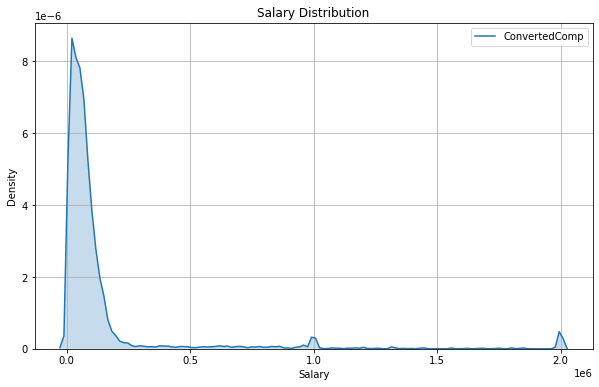

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove any NaN values from the column
converted_comp = df['ConvertedComp'].dropna()

# Plot the distribution curve using seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(converted_comp, shade=True)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Salary Distribution')

plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


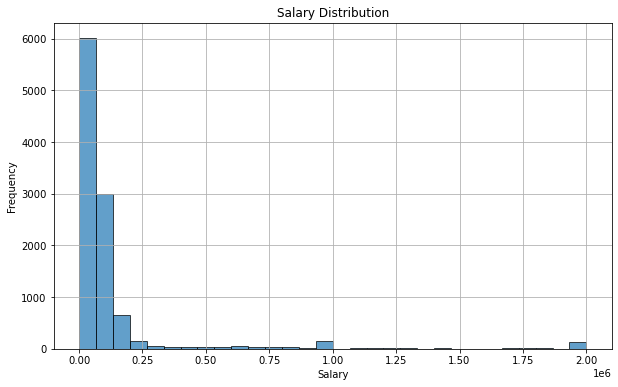

In [18]:
# your code goes here
import matplotlib.pyplot as plt

# Access the ConvertedComp column in the dataframe
converted_comp = df['ConvertedComp']

# Remove any NaN values from the column
converted_comp = converted_comp.dropna()

# Plot the distribution curve
plt.figure(figsize=(10, 6))  
converted_comp.plot.hist(bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [19]:
# Median of column ConvertedComp

median = df['ConvertedComp'].median()

print("The median of ConvertedComp is", median)

The median of ConvertedComp is 57745.0


How many responders identified themselves only as a **Man**?


In [20]:
# Filter the dataframe to include only rows where Gender is "Man"
man_responders = df[df['Gender'] == 'Man']

# Calculate the count of responders who identified only as a man
count_man_responders = len(man_responders)

# Print the count of responders
print("Number of responders identified only as a man:", count_man_responders)


Number of responders identified only as a man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [21]:
# Filter the dataframe to include only rows where Gender is "Man"
woman_responders = df[df['Gender'] == 'Woman']

# Calculate the count of responders who identified only as a man
median_converted_comp_woman = woman_responders['ConvertedComp'].median()

# Print the count of responders
print("Number of responders identified only as a man:", median_converted_comp_woman)


Number of responders identified only as a man: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [22]:
# define ConvertedComp column in the dataframe
age = df['Age']

# Calculate the five-number summary
summary = age.describe()

# Print the five-number summary
print(summary)


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


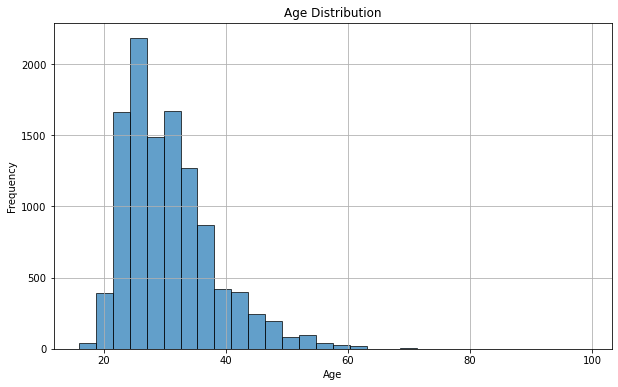

In [23]:
import matplotlib.pyplot as plt

# Access the ConvertedComp column in the dataframe
age = df['Age']

# Remove any NaN values from the column
age = age.dropna()

# Plot the distribution curve
plt.figure(figsize=(10, 6))  
age.plot.hist(bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


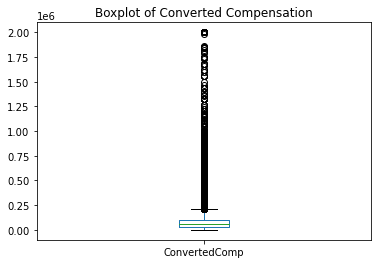

In [24]:
# Extract the 'ConvertedComp' column
converted_comp = df['ConvertedComp']

# Create the boxplot using Pandas
converted_comp.plot(kind='box')

# Set the title
plt.title('Boxplot of Converted Compensation')

# Display the plot
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [25]:
# Extract the 'ConvertedComp' column
converted_comp = df['ConvertedComp']

# Calculate the interquartile range (IQR)
Q1 = converted_comp.quantile(0.25)
Q3 = converted_comp.quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)


Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [26]:
# Extract the 'ConvertedComp' column
converted_comp = df['ConvertedComp']

# Calculate the lower and upper bounds
Q1 = converted_comp.quantile(0.25)
Q3 = converted_comp.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [27]:
# Identify outliers
outliers = converted_comp[(converted_comp < lower_bound) | (converted_comp > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of outliers:", num_outliers)


Number of outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [28]:
# Create a new DataFrame by removing outliers
new_df = df[(converted_comp >= lower_bound) & (converted_comp <= upper_bound)]

# Display the new DataFrame
print(new_df)

       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
4      Less tha

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [30]:

# Calculate the correlation between 'Age' and other numerical columns
correlations = df.corr()['Age']

# Display the correlations
print(correlations)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


In [39]:
print(df['CompTotal'])

0         61000.0
1        138000.0
2         90000.0
3         29000.0
4         90000.0
           ...   
11393    130000.0
11394     74400.0
11395    105000.0
11396     80000.0
11397         NaN
Name: CompTotal, Length: 11398, dtype: float64


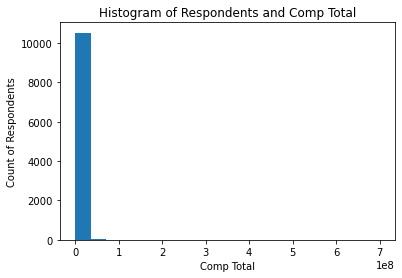

In [43]:
# Plot histogram
plt.hist(df['CompTotal'], bins=20)

# Set labels and title
plt.xlabel('Comp Total')
plt.ylabel('Count of Respondents')
plt.title('Histogram of Respondents and Comp Total')

# Display the plot
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
